<a href="https://colab.research.google.com/github/shorub/Projects/blob/main/Accident_df.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('accident_df.csv')
df.head()

<ipython-input-2-de553fa164b6>:1: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('accident_df.csv')


,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,10219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9.0,1.0,9.0,9.0,0.0,0.0,1.0,3.0,2.0,E01004576
1,2020010220496,2020,10220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,4.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01003034
2,2020010228005,2020,10228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,0.0,4.0,1.0,2.0,0.0,0.0,1.0,1.0,2.0,E01004726
3,2020010228006,2020,10228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,4.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01003617
4,2020010228011,2020,10228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01004763


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

,0
accident_index,0
accident_year,0
accident_reference,0
location_easting_osgr,0
location_northing_osgr,0
longitude,0
latitude,0
police_force,0
accident_severity,0
number_of_vehicles,0


In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
df['time'] = pd.to_datetime(df['time'], format='%H:%M')

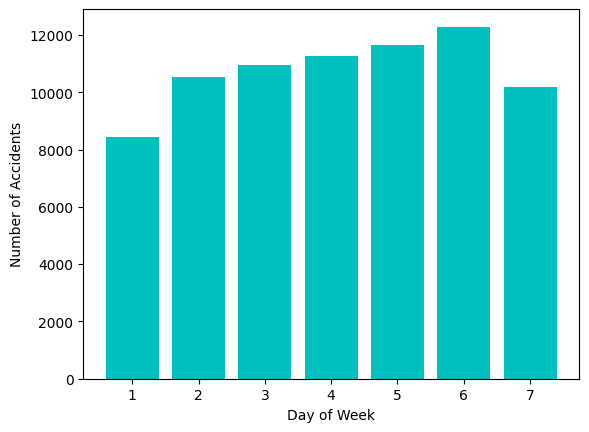

In [ ]:
day = df['day_of_week']
weekly_accidents = df['day_of_week'].value_counts()

plt.bar(weekly_accidents.index, weekly_accidents.values, color = 'c')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.show()

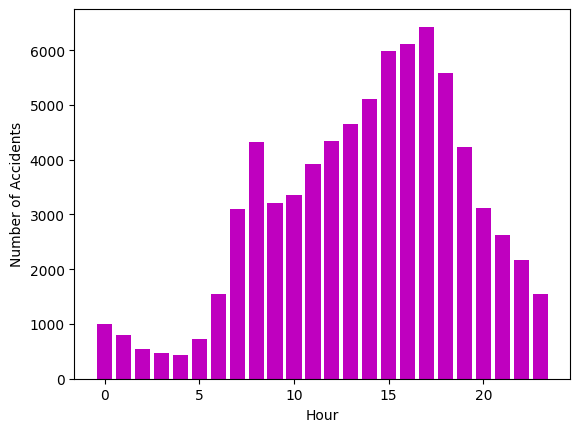

In [ ]:
hour = df['time'].dt.hour
hourly_accidents = hour.value_counts()

plt.bar(hourly_accidents.index, hourly_accidents.values, color = 'm')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.show()

Text(0, 0.5, 'Number of Accidents')

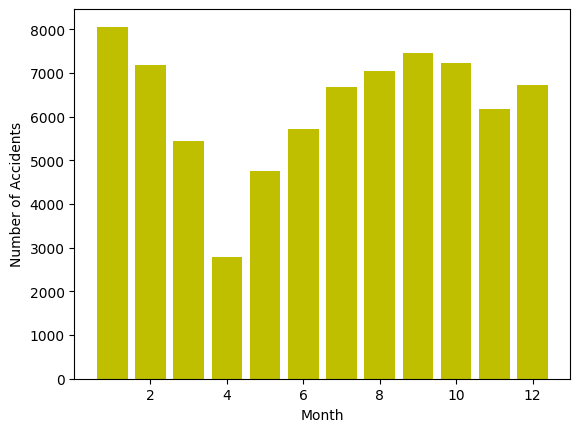

In [ ]:
month = df['date'].dt.month
monthly_accidents = month.value_counts()

plt.bar(monthly_accidents.index, monthly_accidents.values, color = 'y')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')

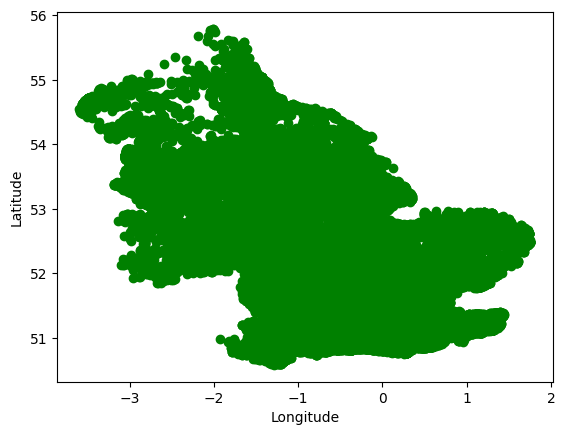

In [ ]:
plt.scatter(df['longitude'], df['latitude'], color = 'g')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

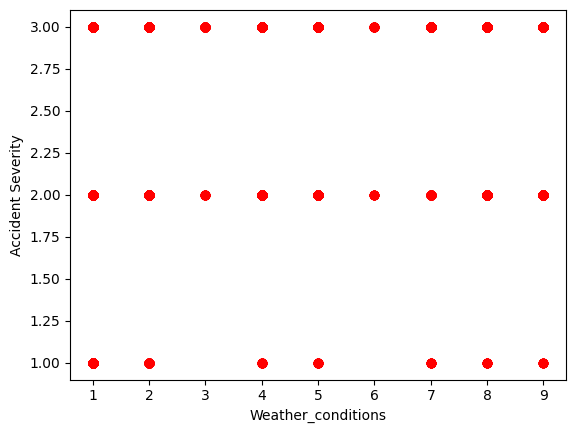

In [ ]:
plt.scatter(df['weather_conditions'], df['accident_severity'], color = 'r')
plt.xlabel('Weather_conditions')
plt.ylabel('Accident Severity')
plt.show()

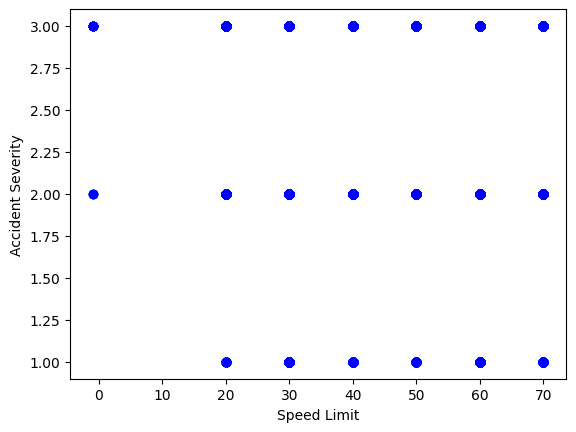

In [ ]:
plt.scatter(df['speed_limit'], df['accident_severity'], color = 'b')
plt.xlabel('Speed Limit')
plt.ylabel('Accident Severity')
plt.show()

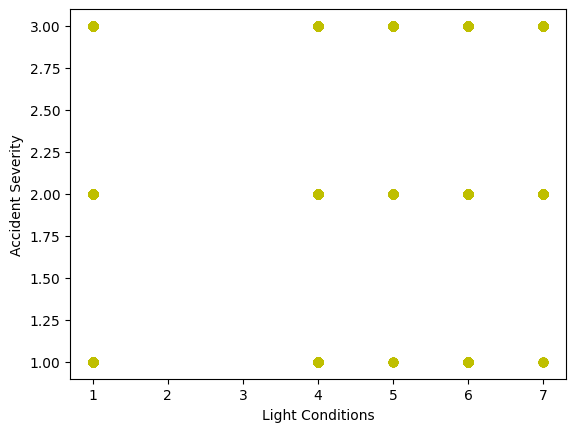

In [ ]:
plt.scatter(df['light_conditions'], df['accident_severity'], color = 'y')
plt.xlabel('Light Conditions')
plt.ylabel('Accident Severity')
plt.show()

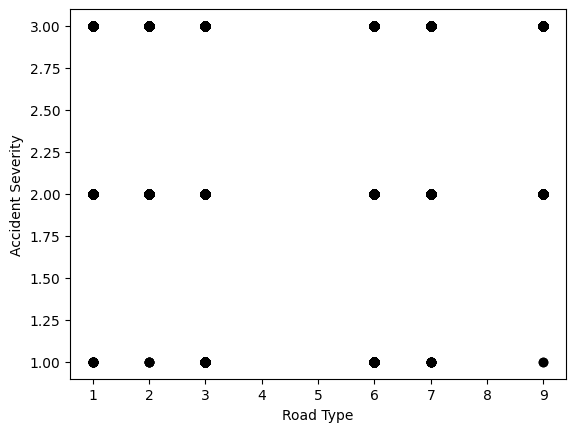

In [ ]:
plt.scatter(df['road_type'], df['accident_severity'], color = 'k')
plt.xlabel('Road Type')
plt.ylabel('Accident Severity')
plt.show()

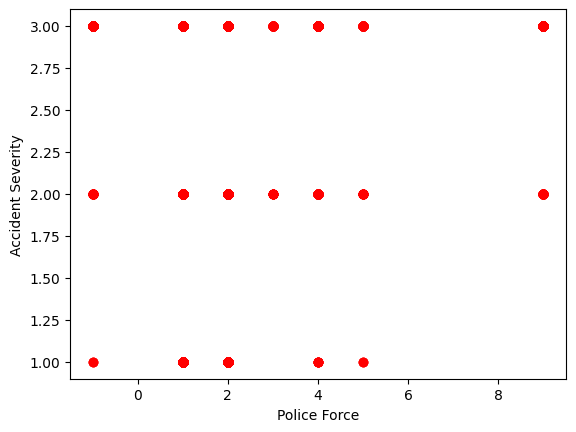

In [ ]:
plt.scatter(df['road_surface_conditions'], df['accident_severity'], color = 'r')
plt.xlabel('Police Force')
plt.ylabel('Accident Severity')
plt.show()

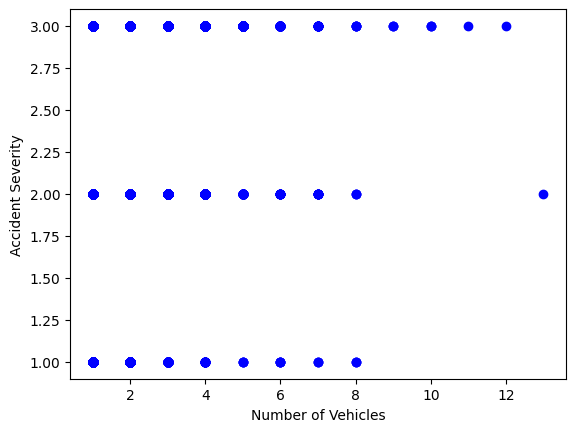

In [ ]:
plt.scatter(df['number_of_vehicles'], df['accident_severity'], color = 'b')
plt.xlabel('Number of Vehicles')
plt.ylabel('Accident Severity')
plt.show()

<Axes: >

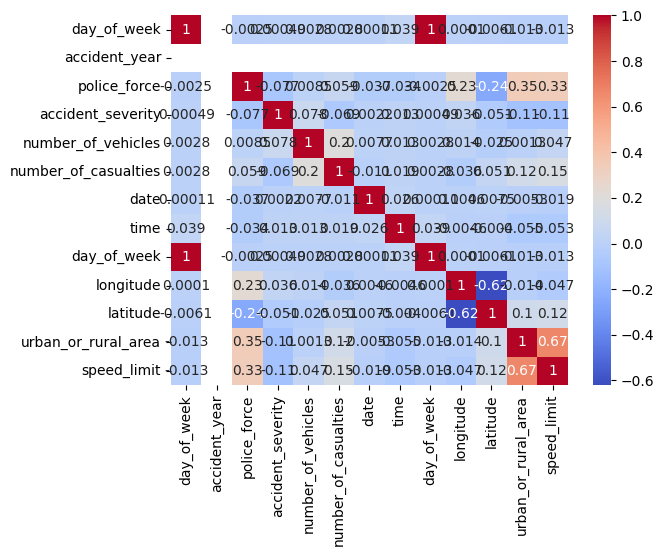

In [ ]:
data = df[['day_of_week', 'accident_year', 'police_force', 'accident_severity', 'number_of_vehicles', 'number_of_casualties', 'date', 'time', 'day_of_week',
           'longitude', 'latitude', 'urban_or_rural_area', 'speed_limit']]
corr = data.corr()

sns.heatmap(corr, annot = True, cmap = 'coolwarm')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [ ]:
time = df['time']
day = df['day_of_week']
accidents = df['accident_index'].value_counts()

x = day.values
x = x.reshape(-1, 1)
y = accidents

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
r_2 = r2_score(y_test, model.predict(x_test))
print("R²:", r_2)
accuracy = accuracy_score(y_test, model.predict(x_test))
print("Accuracy:", accuracy)

R²: 1.0
Accuracy: 1.0


In [ ]:
number_of_vehicles = df['number_of_vehicles']
number_of_casualties = df['number_of_casualties']
speed_limit = df['speed_limit']
time = df['time'].dt.hour

x = number_of_vehicles, number_of_casualties, speed_limit, df['time'].dt.hour
x = np.array(x).T
y = accidents

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
model = RandomForestClassifier()
model.fit(x_train, y_train)
r_2 = r2_score(y_test, model.predict(x_test))
print("R²:", r_2)
accuracy = accuracy_score(y_test, model.predict(x_test))
print("Accuracy:", accuracy)


R²: 1.0
Accuracy: 1.0


In [ ]:
x = df[['longitude', 'latitude', 'weather_conditions', 'light_conditions', 'road_surface_conditions']]
y = df['accident_severity']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
model = RandomForestClassifier(n_estimators= 100, random_state= 42)
model.fit(x_train, y_train)
r_2 = r2_score(y_test, model.predict(x_test))
print("R²:", r_2)

R²: -0.45699771096726827


In [ ]:
accuracy = accuracy_score(y_test, model.predict(x_test))
print("Accuracy:", accuracy)


Accuracy: 0.7468127490039841
